In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
class AdalineGd(object):
    def __init__(self,eta=0.01,n_iter=50):
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self,X,y):
        self.w_=np.zeros(1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            output=self.net_input(X)
            errors=(y-output)
            self.w_[1:]+=self.eta * X.T.dot(errors)
            self.w_[0]+=self.eta * errors.sum()
            cost=(errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
     
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self,X):
        return self.net_input(X)
    def predict(self,X):
        return np.where(self.activation(X) >= 0.0 ,1,-1)

In [10]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


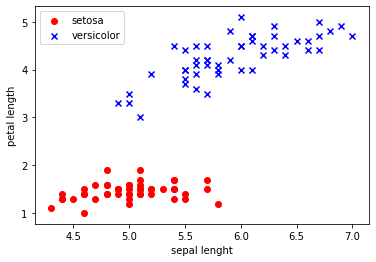

In [11]:
    
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
X=df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal lenght')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()    


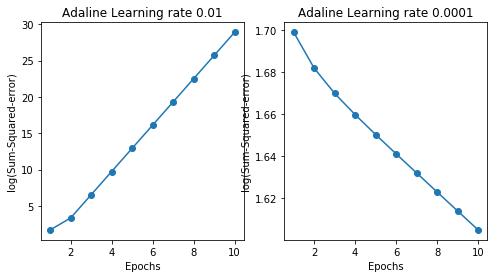

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ada1=AdalineGd(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared-error)')
ax[0].set_title('Adaline Learning rate 0.01')
ada2=AdalineGd(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),np.log10(ada2.cost_),marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-Squared-error)')
ax[1].set_title('Adaline Learning rate 0.0001')
plt.show()

In [18]:
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

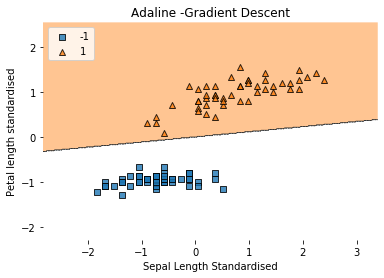

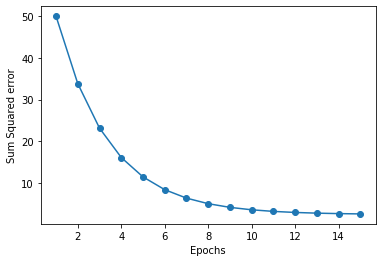

In [25]:
import import_ipynb
from mlxtend.plotting import plot_decision_regions
ada=AdalineGd(n_iter=15,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,ada)
plt.title('Adaline -Gradient Descent')
plt.xlabel('Sepal Length Standardised')
plt.ylabel('Petal length standardised')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Squared error')
plt.show()